# Analisi segnali audio (wav)

Importiamo 
- la funzione `read` dalla libreria  `scipy.io.wavfile` per leggere il file `wav` salvarlo in un array

- la funzione `fft`(Fast Fourier Transform) dalla libreria `scipy.fft` per effettuare la trasformata Fourier sul nostro file audio

- importiamo `numpy` con l'alias `np` per operazioni matematiche e gestione dati

- importiamo `matplotlib.pyplot` con l'alias `plt` per poter eseguire plot di dati. `plt.rcParams['figure.figsize'] = [10, 5]` serve a impostare la dimensione dei plot (in pollici)

- importiamo `ipywidgets`con l'alias `widgets` per inserire elementi interattivi

In [1]:
from scipy.io.wavfile import read
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
import ipywidgets as widgets


Salviamo l'ubicazione dei nostri file audio nella lista `files` e poi leggiamo il contenuto e lo salviamo in `sounds`. `sounds[i][k]` sarà una lista di liste con :
-  `i`  : indice del file audio
- `k=0` : sample rate 
- `k=1`: dati audio

Salviamo i dati audio di ogni file nella lista `signals`

In [2]:
files=['sounds/Sound1.wav', 'sounds/Sound2.wav', 'sounds/Sound3.wav', 'sounds/Sound4.wav', 'sounds/Sound1234.wav']
sounds = [read(f) for f in files]


signals = [sound[1][:, 1] for sound in sounds]
print("Ogni file contiene {} dati ad un sample rate di {} Hz e quindi di una durata di circa {:.2f} secondi"
        .format(
            len(signals[0]),
            sounds[0][0],
            len(signals[0])/sounds[0][0]
            )
        )

Ogni file contiene 90833 dati ad un sample rate di 48000 Hz e quindi di una durata di circa 1.89 secondi


C:\Users\fulviof\AppData\Local\Temp\ipykernel_19136\2700166608.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sounds = [read(f) for f in files]


In [3]:
sample_start=20000
sample_end=22000
def plot_signal(sample_start, sample_end):
    plt.plot(signals[0][sample_start:sample_end])
widgets.interact(plot_signal,sample_start=(0,20000),sample_end=(20500,90833))

interactive(children=(IntSlider(value=10000, description='sample_start', max=20000), IntSlider(value=55666, de…

<function __main__.plot_signal(sample_start, sample_end)>

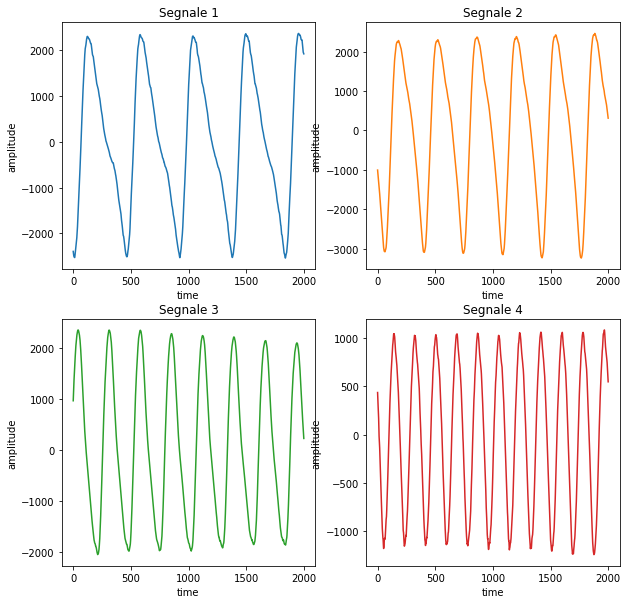

In [4]:

fig, axs = plt.subplots(2, 2,figsize=(10, 10))
axs[0, 0].plot(signals[0][20000:22000])
axs[0, 0].set_title('Segnale 1')
axs[0, 1].plot(signals[1][20000:22000], 'tab:orange')
axs[0, 1].set_title('Segnale 2')
axs[1, 0].plot(signals[2][20000:22000], 'tab:green')
axs[1, 0].set_title('Segnale 3')
axs[1, 1].plot(signals[3][20000:22000], 'tab:red')
axs[1, 1].set_title('Segnale 4')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='amplitude')
    


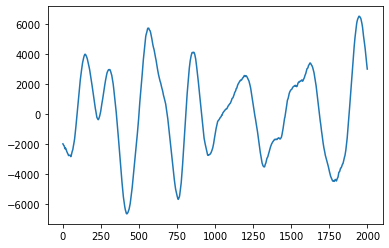

In [5]:
plt.plot(signals[4][20000:22000])


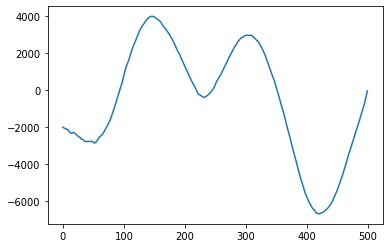

In [6]:
plt.plot(signals[4][20000:20500])

In [7]:
signals_fft = [fft(signal) for signal in signals]
signals_fft[0]

array([ -12123.            -0.j        ,   -3079.54028984 -6320.5733744j ,
       -192863.03575254-10711.73198624j, ...,
        115642.93240469 +6658.82164472j, -192863.03575254+10711.73198624j,
         -3079.54028984 +6320.5733744j ])

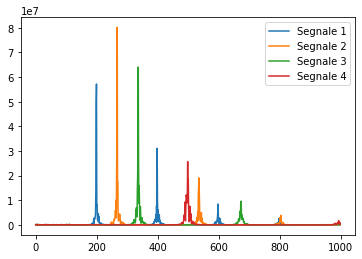

In [8]:
fig, ax = plt.subplots()
fft_0, = ax.plot(abs(signals_fft[0][1:1000]),label='Segnale 1')
fft_1, = ax.plot(abs(signals_fft[1][1:1000]),label='Segnale 2')
fft_2, = ax.plot(abs(signals_fft[2][1:1000]),label='Segnale 3')
fft_3, = ax.plot(abs(signals_fft[3][1:1000]),label='Segnale 4')
ax.legend(handles=[fft_0, fft_1,fft_2,fft_3])


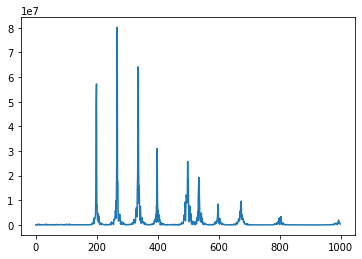

In [9]:

plt.plot(abs(signals_fft[4][1:1000]))

# DFT

$$X_f=\sum_{n=0}^{N-1} x_n \cdot e^{\frac{-2\pi i}{N}\cdot n f}$$

In [10]:
def dft(signal):
	N = len(signal)
	# Precompute all the roots of unity we'll need.
	# Zeta here refers to exp(-2π * im / N).
	zeta_powers = [ np.exp(-2*np.pi * 1j * n / N) for n in range(0,N)]


	return [
     	sum(signal[n] * zeta_powers[(n * f) % N]
			for n in range(0,N)
		)
		for f in range(0,N)
	]

In [11]:
dft(signals[0][0:1000])

[(-466+0j),
 (-436.14111805021827-162.34826938653828j),
 (-351.3974677282492-301.9369287524478j),
 (-225.3177556388333-400.1012495684959j),
 (-77.52635932090408-445.50787437741326j),
 (70.0247499527377-435.87306758680705j),
 (197.09861070957749-377.8508356413643j),
 (288.65743865757526-285.1908868310419j),
 (337.09317748634567-175.64239278226364j),
 (342.82050203910006-67.33107592478454j),
 (313.2328608713437+24.590947238144487j),
 (260.3846624977403+90.33981746002087j),
 (198.01752617077247+126.52361247677406j),
 (138.6408282600714+135.7241352438378j),
 (91.29515201966211+124.89927649366123j),
 (60.404308547299784+103.11044577707773j),
 (45.82315565933603+79.17830877559317j),
 (43.89455769518547+59.8134648223238j),
 (49.11218694972916+48.58501929106759j),
 (55.8934200112905+45.8376618990231j),
 (60.00920471154099+49.41787945850212j),
 (59.37023734818124+55.88625967909089j),
 (54.07942268063895+61.81597200636347j),
 (45.867350006137585+64.81564670202997j),
 (37.17564808427331+64.044564

In [12]:
fft(signals[0][0:1000])

array([-4.66000000e+02-0.00000000e+00j, -4.36141118e+02-1.62348269e+02j,
       -3.51397468e+02-3.01936929e+02j, -2.25317756e+02-4.00101250e+02j,
       -7.75263593e+01-4.45507874e+02j,  7.00247500e+01-4.35873068e+02j,
        1.97098611e+02-3.77850836e+02j,  2.88657439e+02-2.85190887e+02j,
        3.37093177e+02-1.75642393e+02j,  3.42820502e+02-6.73310759e+01j,
        3.13232861e+02+2.45909472e+01j,  2.60384662e+02+9.03398175e+01j,
        1.98017526e+02+1.26523612e+02j,  1.38640828e+02+1.35724135e+02j,
        9.12951520e+01+1.24899276e+02j,  6.04043085e+01+1.03110446e+02j,
        4.58231557e+01+7.91783088e+01j,  4.38945577e+01+5.98134648e+01j,
        4.91121869e+01+4.85850193e+01j,  5.58934200e+01+4.58376619e+01j,
        6.00092047e+01+4.94178795e+01j,  5.93702373e+01+5.58862597e+01j,
        5.40794227e+01+6.18159720e+01j,  4.58673500e+01+6.48156467e+01j,
        3.71756481e+01+6.40445644e+01j,  3.02093487e+01+6.01634592e+01j,
        2.62392294e+01+5.48317398e+01j,  2.53211910

In [13]:
np.isclose(dft(signals[0][0:1000]),fft(signals[0][0:1000]))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,